Exploratory Data Analysis - Terrorism
(Level - Intermediate)



● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ <br>
● As a security/defense analyst, try to find out the hot zone of terrorism. <br>
● What all security issues and insights you can derive by EDA? <br>
● You can choose any of the tool of your choice <br>
(Python/R/Tableau/PowerBI/Excel/SAP/SAS) 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from folium import plugins


In [2]:
terror_df= pd.read_csv("terror.csv",low_memory=False)
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
print(terror_df.dtypes)

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object


In [4]:
len(terror_df.columns)

135

In [5]:
terror_df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [6]:
terror_df.describe

<bound method NDFrame.describe of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  regi

In [7]:
df= terror_df[['eventid','iyear','imonth','iday','country','country_txt','region','region_txt','provstate','city','latitude','longitude']].copy()

In [8]:
df.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361


In [9]:
df.columns=['id','year','month','day','country_id','country','region_id','region','state','city','latitude','longitude']

In [10]:
df.tail(50)

,id,year,month,day,country_id,country,region_id,region,state,city,latitude,longitude
181641,201712290026,2017,12,24,147,Nigeria,11,Sub-Saharan Africa,Benue,Odonto,7.042064,8.003725
181642,201712290029,2017,12,29,182,Somalia,11,Sub-Saharan Africa,Banaadir,Mogadishu,2.059819,45.326115
181643,201712290031,2017,12,31,78,Greece,8,Western Europe,Attica,Piraeus,37.966024,23.663207
181644,201712290032,2017,12,31,78,Greece,8,Western Europe,Attica,Piraeus,37.969891,23.642225
181645,201712300002,2017,12,31,95,Iraq,10,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,44.375465
181646,201712300003,2017,12,30,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773
181647,201712300004,2017,12,30,95,Iraq,10,Middle East & North Africa,Kirkuk,Az Zahra,35.256849,44.365502
181648,201712300005,2017,12,30,95,Iraq,10,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,44.375465
181649,201712300006,2017,12,30,4,Afghanistan,6,South Asia,Balkh,Mazari Sharif,36.709930,67.115700
181650,201712300007,2017,12,30,153,Pakistan,6,South Asia,Balochistan,Quetta,30.200819,66.994354


In [11]:
state_df= pd.DataFrame(columns=['Total'])


In [12]:
country_df= pd.DataFrame(columns=["Total"])

In [13]:
country_df['Total']= df.groupby("country_id")['country'].value_counts().nlargest(10)


In [14]:
state_df['Total']=df.groupby("country")['state'].value_counts().nlargest(10)


In [15]:
state_df= state_df.reset_index()
state_df

,country,state,Total
0,Iraq,Baghdad,7644
1,United Kingdom,Northern Ireland,4498
2,Pakistan,Balochistan,3710
3,Iraq,Saladin,3411
4,Iraq,Al Anbar,3299
5,Iraq,Nineveh,3241
6,Pakistan,Sindh,3206
7,Pakistan,Khyber Pakhtunkhwa,3084
8,Iraq,Diyala,3041
9,Peru,Lima,2615


In [16]:
country_df= country_df.reset_index()
country_df.shape

(10, 3)

In [17]:
"""key_list= list(country_df['country'])
key_list
dict_la= dict(zip(df['country'],df['latitude']))
dict_lo= dict(zip(df['country'],df['longitude']))
country_df['Latitude']= [dict_la[item] for item in key_list]
country_df['Longitude']= [dict_lo[item] for item in key_list]
"""
for i,country in enumerate(country_df['country']):
    address="{}".format(country)
    geolocator= Nominatim(user_agent="world_finder")
    location= geolocator.geocode(address)
    lat= location.latitude
    long=location.longitude
    print("{} is Lat and {} is Long of {}".format(lat,long,country))
    country_df.loc[i,"Latitude"]= lat
    country_df.loc[i,"Longitude"]=long

33.0955793 is Lat and 44.1749775 is Long of Iraq
30.3308401 is Lat and 71.247499 is Long of Pakistan
33.7680065 is Lat and 66.2385139 is Long of Afghanistan
22.3511148 is Lat and 78.6677428 is Long of India
2.8894434 is Lat and -73.783892 is Long of Colombia
12.7503486 is Lat and 122.7312101 is Long of Philippines
-6.8699697 is Lat and -75.0458515 is Long of Peru
13.8000382 is Lat and -88.9140683 is Long of El Salvador
54.7023545 is Lat and -3.2765753 is Long of United Kingdom
38.9597594 is Lat and 34.9249653 is Long of Turkey


In [18]:
country_df.head()

,country_id,country,Total,Latitude,Longitude
0,95,Iraq,24636,33.095579,44.174977
1,153,Pakistan,14368,30.330840,71.247499
2,4,Afghanistan,12731,33.768006,66.238514
3,92,India,11960,22.351115,78.667743
4,45,Colombia,8306,2.889443,-73.783892


In [19]:
state_df.columns

Index(['country', 'state', 'Total'], dtype='object')

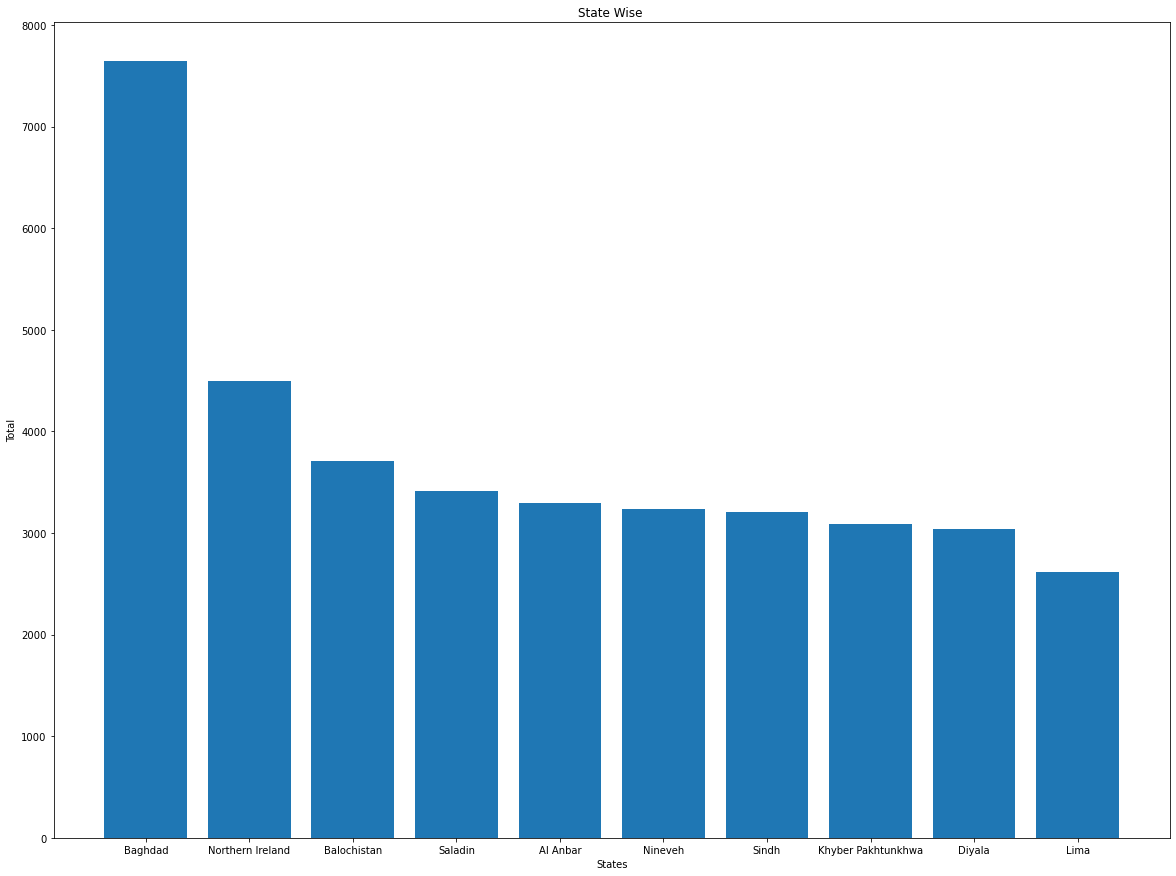

In [20]:
fig= plt.figure(figsize=(20,15))
plt.bar(state_df['state'],state_df['Total'])
plt.xlabel("States")
plt.ylabel("Total")
plt.title("State Wise ")
plt.show()

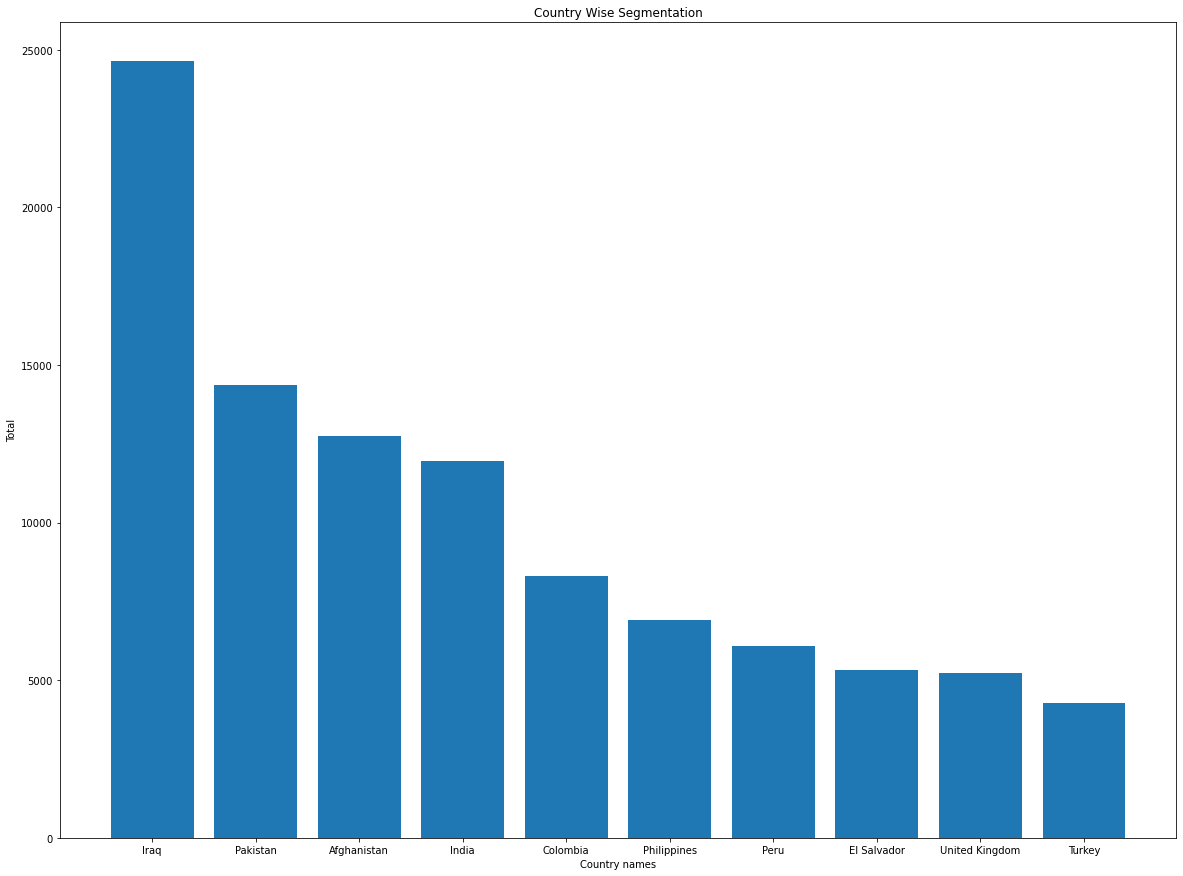

In [21]:
fig= plt.figure(figsize=(20,15))
plt.bar(country_df['country'],country_df['Total'])
plt.xlabel("Country names")
plt.ylabel("Total")
plt.title("Country Wise Segmentation")
plt.show()

In [22]:
terror_map= folium.Map(zoom_start=8)


In [23]:
count=1
for lat,long,country in zip(country_df['Latitude'],country_df['Longitude'],country_df['country']):
    label= "{}.{}".format(count,country)
    Label= folium.Popup(label,parse_html=True)
    if count==1:
        folium.Marker([lat,long],popup=Label,icon=folium.Icon(color="red",icon="value=10")).add_to(terror_map)
        count+=1
    else:
        folium.Marker([lat,long],popup=Label,icon=folium.Icon(color="green",icon="count")).add_to(terror_map)
        count+=1
terror_map

In [42]:
targ_df= pd.DataFrame()

In [154]:
targ_df= terror_df['targtype1_txt'].value_counts().nlargest(10)

In [155]:
targ_df= targ_df.reset_index()
targ_df

,index,targtype1_txt
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


In [156]:
targ_df.columns=['Target','Total']

In [157]:
targ_df

,Target,Total
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


In [120]:
attack_df= pd.DataFrame()

In [149]:
attack_df= terror_df['attacktype1_txt'].value_counts().nlargest(10)

In [151]:
attack_df= attack_df.reset_index()

In [152]:
attack_df.head()

,index,attacktype1_txt
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356


In [153]:
attack_df.columns=['Attack Types','Total']

In [131]:
attack_df.shape
attack_df.head()

,Attack Types,Total
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356


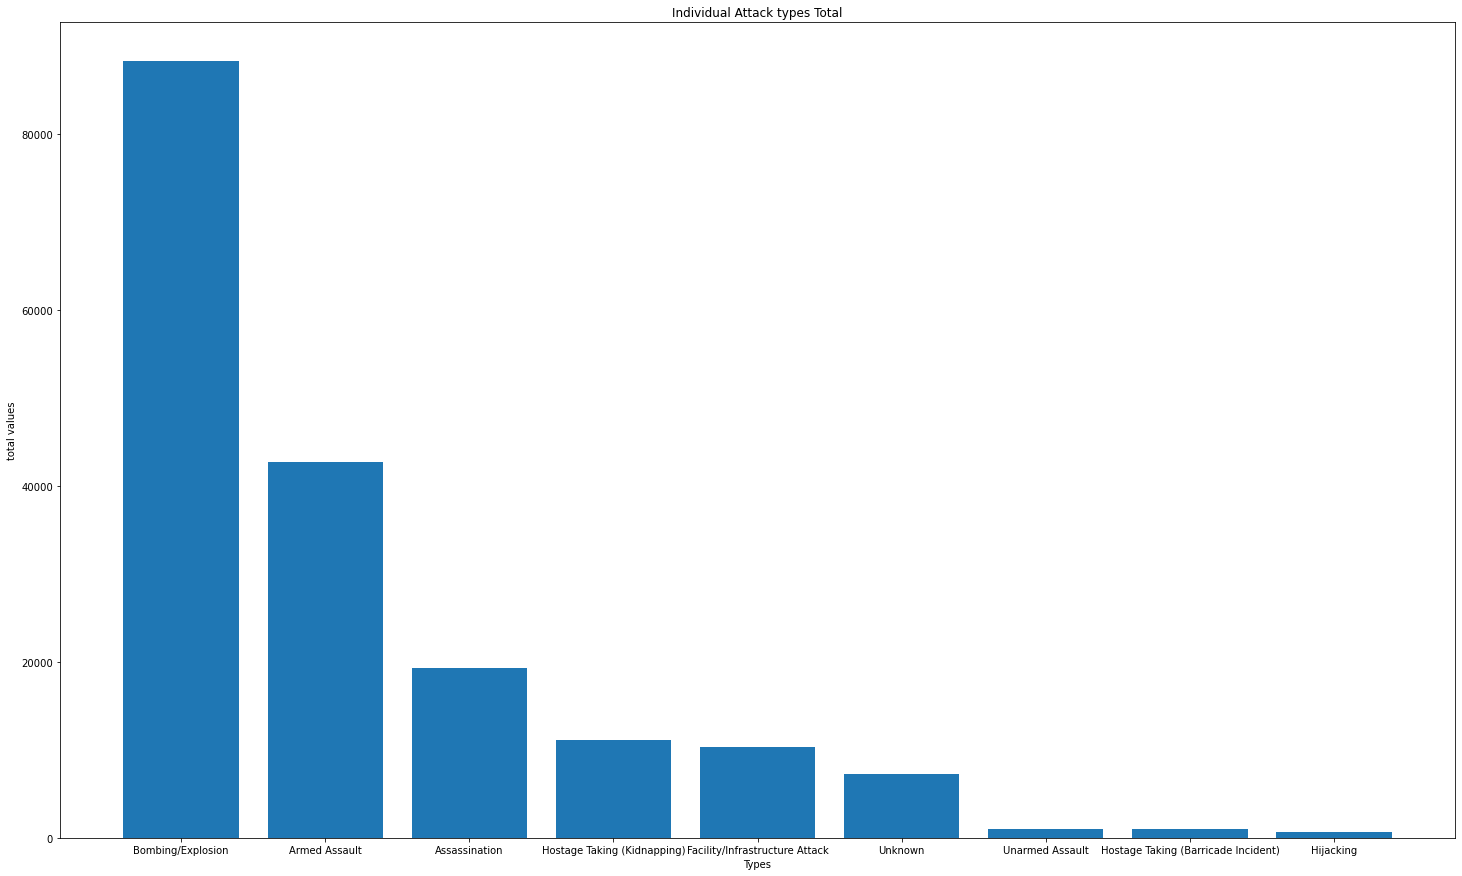

In [160]:
fig= plt.figure(figsize=(25,15))
plt.bar(attack_df['Attack Types'],attack_df['Total'])
plt.xlabel("Types")
plt.ylabel("total values")
plt.title("Individual Attack types Total")
plt.show()


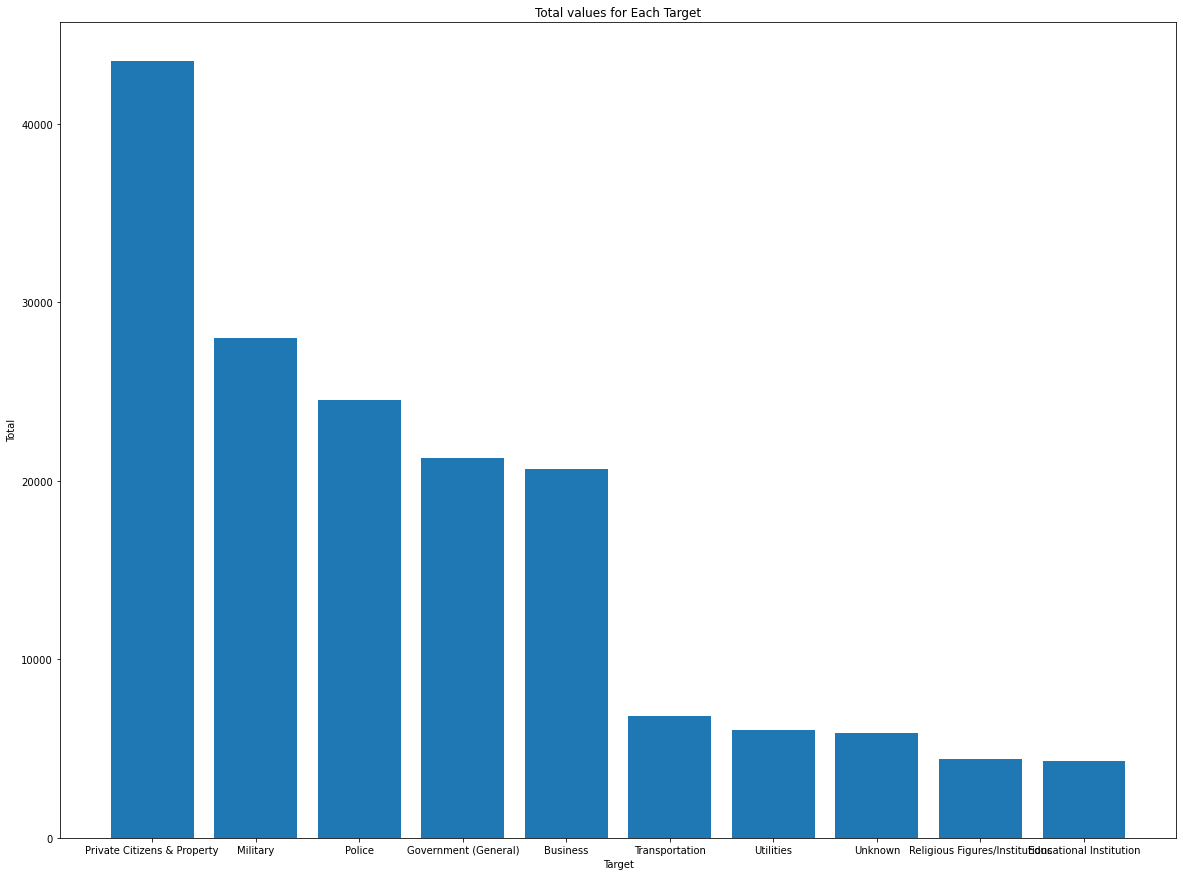

In [161]:
fig= plt.figure(figsize=(20,15))
plt.bar(targ_df['Target'],targ_df['Total'])
plt.xlabel("Target")
plt.ylabel("Total")
plt.title("Total values for Each Target")
plt.show()

# INFERENCES

As a security/defense analyst, try to find out the hot zone of terrorism. 

* From the map it is found that <b>Iraq</b> is the hot zone of Terrorism

What all security issues and insights you can derive by EDA?

* Major type of attack is caused by <b>Bombing/Explosion</b> and attacks are primarily focused on <b>Private Citizens and Properties.</b>